In [21]:
import pandas as pd
import numpy as np
from pylab import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhc_risk_kit as erk
ind = erk.get_ind_returns()
er = erk.annual_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def msr(riskfree_rate, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1 = {
                        'type':'eq',
                        'fun':lambda weights: np.sum(weights) - 1
                       }
    def neg_sharpe(weights, riskfree_rate, er, cov):
        r = erk.portfolio_returns(weights, er)
        vol=erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
        
    weights = minimize(neg_sharpe, portfolio_vol, init_guess, 
                      args=(cov, riskfree_rate, er), method='SLSQP',
                      options={'disp': False},
                      constraints=(weights_sum_to_1,returns_is_target),
                      bounds=bounds)
    return weights.x

(0, 0.13653194556346115)

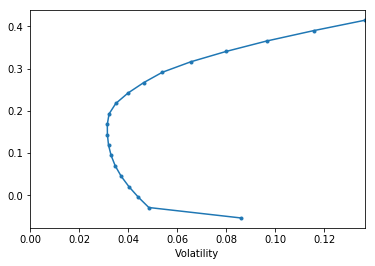

In [3]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left=0)

In [4]:
rf = 0.1
w_msr= erk.msr(rf, er, cov)
w_msr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.56147692e-15,
       0.00000000e+00, 3.50533797e-16, 3.66139438e-15, 4.55961446e-01,
       2.05360806e-16, 3.20037188e-15, 6.31089251e-15, 2.36663890e-15,
       0.00000000e+00, 2.33810823e-01, 1.61542156e-16, 0.00000000e+00,
       9.99345810e-15, 1.38704162e-01, 0.00000000e+00, 8.94092021e-02,
       0.00000000e+00, 3.54947811e-15, 1.55177181e-02, 0.00000000e+00,
       1.74558794e-15, 0.00000000e+00, 6.65966493e-02, 2.18347114e-15,
       0.00000000e+00, 7.24136431e-15])

In [5]:
r_msr=erk.portfolio_returns(w_msr, er)
vol_msr=erk.portfolio_vol(w_msr, cov)
cml_x=[0,vol_msr]
cml_y=[rf,r_msr]

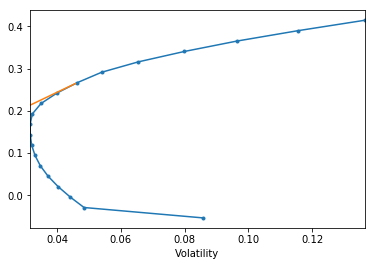

In [19]:
ax = erk.plot_ef(20,er,cov)
ax.plot(cml_x, cml_y)


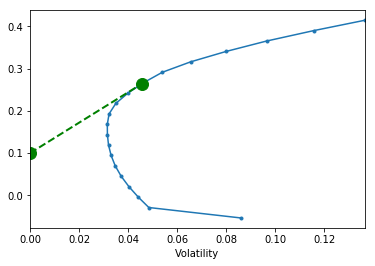

In [23]:
erk.plot_ef(20, er, cov, 0.1, True)